# EDA on social posts

### Intoduction:
The story is about analyzing the engagement metrics of posts from a news provider to identify patterns in user interaction. We want to visualize average likes, comments, and reposts, and find any interesting relationships between these metrics.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('threads_news_data.csv')

In [3]:
df.head()

,Username,Hashtags,Headings,Likes,Comments,Repost,Replies
0,washingtonpost,['NA'],President Biden on Monday night issued a blist...,3.8K,213.0,340.0,NaN
1,washingtonpost,['Read more:'],"“For all practical purposes, today’s decision ...",2.8K,74.0,218.0,NaN
2,washingtonpost,['Grenada and the nation of St. Vincent and th...,Hurricane Beryl is now a “potentially catastro...,83,9.0,14.0,NaN
3,washingtonpost,['Here are our big takeaways:'],Analysis | The Supreme Court’s conservative su...,40,93.0,7.0,NaN
4,washingtonpost,['NA'],A judge released the transcripts from grand ju...,468,29.0,108.0,NaN


# Data Preprocessing

In [4]:
df.shape

(427, 7)

- The dataset scraped contains 427 rows and 6 columns the last column is NaN values for all rows we will remove that column.

In [4]:
df.drop(['Replies'],axis=1,inplace=True)

In [5]:
df.head()

,Username,Hashtags,Headings,Likes,Comments,Repost
0,washingtonpost,['NA'],President Biden on Monday night issued a blist...,3.8K,213.0,340.0
1,washingtonpost,['Read more:'],"“For all practical purposes, today’s decision ...",2.8K,74.0,218.0
2,washingtonpost,['Grenada and the nation of St. Vincent and th...,Hurricane Beryl is now a “potentially catastro...,83,9.0,14.0
3,washingtonpost,['Here are our big takeaways:'],Analysis | The Supreme Court’s conservative su...,40,93.0,7.0
4,washingtonpost,['NA'],A judge released the transcripts from grand ju...,468,29.0,108.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Username  427 non-null    object 
 1   Hashtags  427 non-null    object 
 2   Headings  424 non-null    object 
 3   Likes     417 non-null    object 
 4   Comments  423 non-null    float64
 5   Repost    419 non-null    float64
dtypes: float64(2), object(4)
memory usage: 20.1+ KB


- The dataset contains the following columns with data types mentioned, The Likes column should be float so we convert that to float.

In [16]:
def convert_to_number(x):
    if isinstance(x, str):
        if 'K' in x:
            return float(x.replace('K', '')) * 1000
        elif 'M' in x:
            return float(x.replace('M', '')) * 1000000
    return float(x)

In [17]:
df['Likes'] = df['Likes'].apply(convert_to_number)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Username  427 non-null    object 
 1   Hashtags  427 non-null    object 
 2   Headings  424 non-null    object 
 3   Likes     417 non-null    float64
 4   Comments  423 non-null    float64
 5   Repost    419 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.1+ KB


In [89]:
df.to_csv('updated_df.csv')

- Now we can analyze the posts using the metrics likes,comments,reposts.

- Firstly we will visualize a box plot for the engagement metrics.

# Analysing the METRICS

### Analysing the LIKE metric

In [31]:
avg_likes = df['Likes'].mean()
avg_comments = df['Comments'].mean()
avg_reposts = df['Repost'].mean()

print(f"Average Likes: {avg_likes}")
print(f"Average Comments: {avg_comments}")
print(f"Average Reposts: {avg_reposts}")

Average Likes: 234.44604316546761
Average Comments: 29.085106382978722
Average Reposts: 32.60620525059666


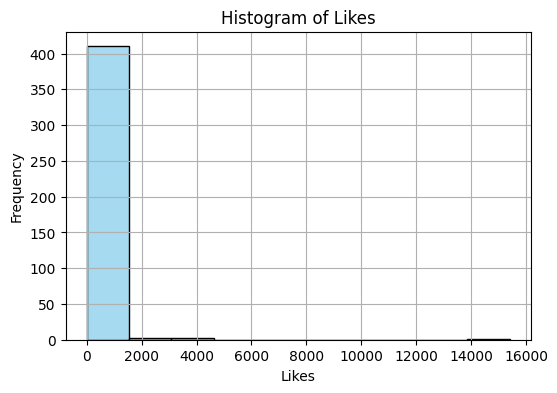

In [86]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Likes'], bins=10, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Likes')

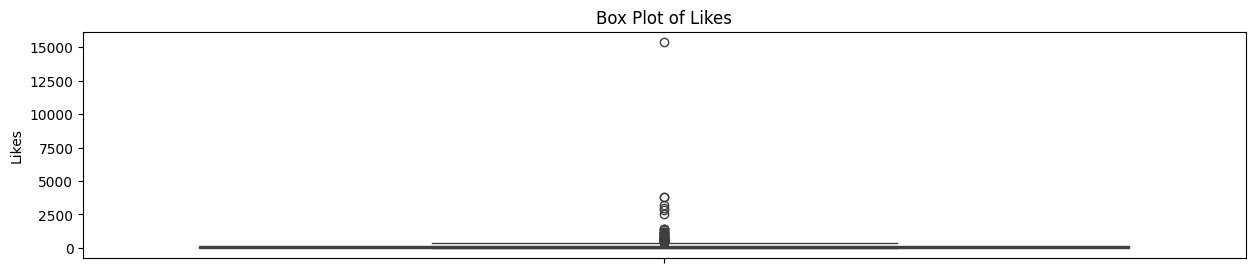

In [28]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.boxplot(data=df['Likes'])
plt.title('Box Plot of Likes')
plt.ylabel('Likes')

- we will calculate the interquartile range in which we can the range of likes where most posts fall.

In [45]:
lower_bound = df['Likes'].quantile(0.05)
upper_bound = df['Likes'].quantile(0.95)

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: 3.0
Upper Bound: 794.3999999999997


In [52]:
filtered_likes = df[(df['Likes'] >= lower_bound) & (df['Likes'] <= upper_bound)]
print("Typical Range of Likes:")
print(filtered_likes['Likes'])

Typical Range of Likes:
2       83.0
3       40.0
4      468.0
5       11.0
6       20.0
       ...  
421    417.0
422    367.0
423    212.0
424    336.0
425    334.0
Name: Likes, Length: 381, dtype: float64


In [55]:
print(df[df['Likes']<lower_bound].count())
print(df[df['Likes']>upper_bound].count())

Username    15
Hashtags    15
Headings    15
Likes       15
Comments    15
Repost      14
dtype: int64
Username    21
Hashtags    21
Headings    21
Likes       21
Comments    21
Repost      21
dtype: int64


Text(0.5, 1.0, 'Box Plot for Likes (Without Outliers)')

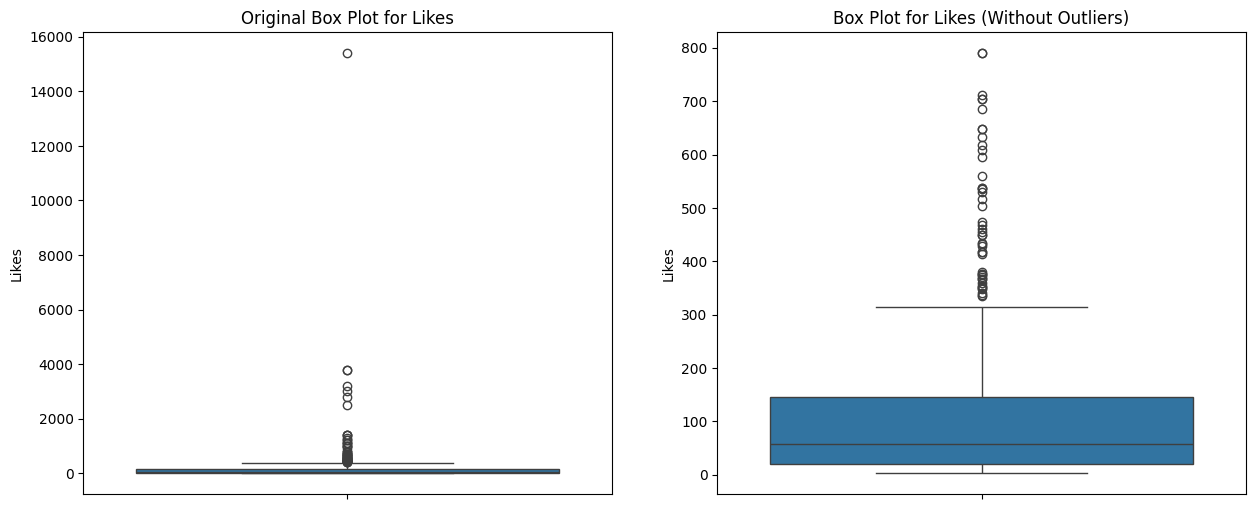

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(df['Likes'], ax=axes[0])
axes[0].set_title('Original Box Plot for Likes')

sns.boxplot(filtered_likes['Likes'], ax=axes[1])
axes[1].set_title('Box Plot for Likes (Without Outliers)')

- The box plot for likes reveals a generally consistent engagement pattern, with most posts receiving between the lower and upper bounds of 3 and 795 likes, respectively. These bounds were determined using the 5th and 95th percentiles, ensuring that extreme outliers are excluded. This range captures the majority of the data, providing a more accurate and meaningful representation of typical audience engagement levels.

In [57]:
avg_likes = filtered_likes['Likes'].mean()
print(f"Average Likes: {avg_likes}")

Average Likes: 124.1994750656168


In [80]:
unreliable_users = df[(df['Likes'] < lower_bound) | (df['Likes'] > upper_bound)]
print("Unreliable Users based on Likes:")
unreliable_usernames=unreliable_users['Username'].unique()
print(unreliable_usernames)

Unreliable Users based on Likes:
['washingtonpost' 'judicialwatch' 'reuters' 'nypost' 'nytimes' 'npr'
 'usatoday' 'apnews' 'msnbc' 'dailycaller' 'independent' 'time']


In [82]:
reliable_users = df[(df['Likes'] >= lower_bound) & (df['Likes'] <= upper_bound)]
print("Reliable News Providers based on Likes:")
reliable_users = reliable_users[~reliable_users['Username'].isin(unreliable_usernames)]
print(reliable_users['Username'].unique())

Reliable News Providers based on Likes:
['dailymail' 'wsj' 'cnn' 'foxnews' 'who' 'newsweek']


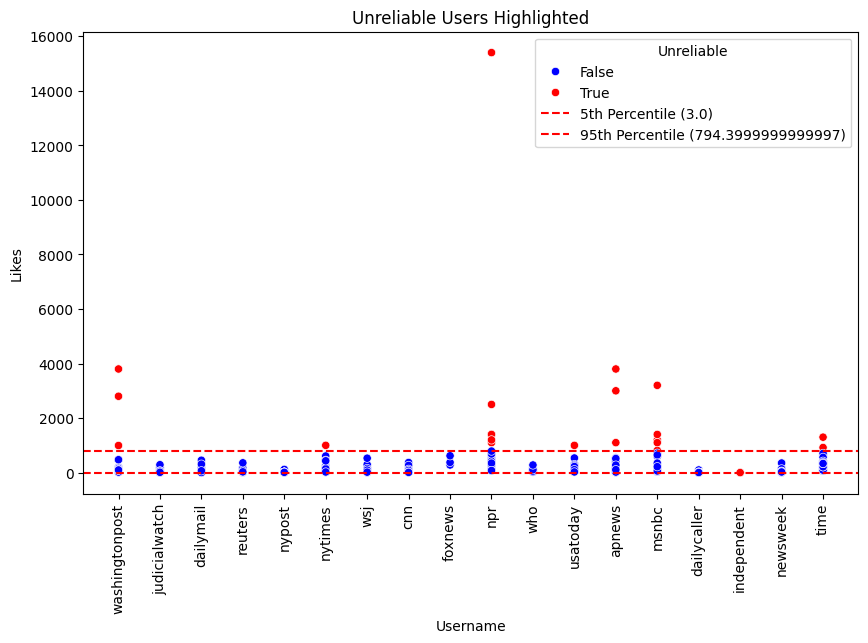

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Username', y='Likes', hue=(df['Likes'] < lower_bound) | (df['Likes'] > upper_bound), palette={True: 'red', False: 'blue'})
plt.title('Unreliable Users Highlighted')
plt.axhline(y=lower_bound, color='red', linestyle='--', label=f'5th Percentile ({lower_bound})')
plt.axhline(y=upper_bound, color='red', linestyle='--', label=f'95th Percentile ({upper_bound})')
plt.legend(title='Unreliable')
plt.xticks(rotation=90)
plt.show()

#### Upon analyzing the likes received by various users, we observed that the majority of the posts receive likes within a specific range, defined between the 5th and 95th percentiles. This range signifies the typical engagement level across our dataset, suggesting a consistent audience interaction for most news providers.

#### However, a subset of users consistently receive likes below the 5th percentile, marking them as outliers in terms of engagement. These users are identified as unreliable based on their lower engagement metrics. This observation raises important considerations about their content's resonance with the audience, prompting a need to reassess content strategies or address potential issues affecting these specific users.

## Unreliable Users based on Likes:
- washingtonpost
- judicialwatch
- reuters
- nypost
- nytimes
- npr
- usatoday
- apnews
- msnbc
- dailycaller
- independent
- time

## Reliable News Providers based on Likes:
- dailymail
- wsj
- cnn
- foxnews
- who
- newsweek

In [87]:
filtered_likes.to_csv('filtered_likes.csv')

### Analysing the Comments metric

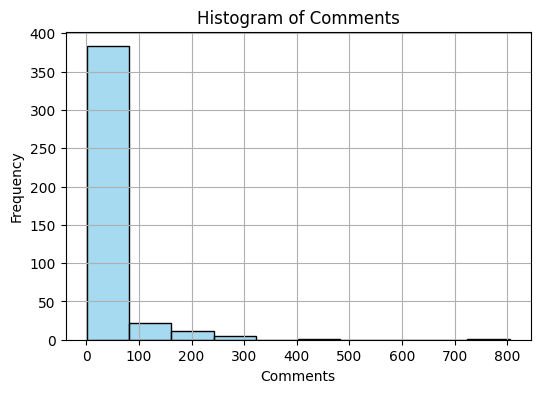

In [6]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Comments'], bins=10, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of Comments')
plt.xlabel('Comments')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Comments')

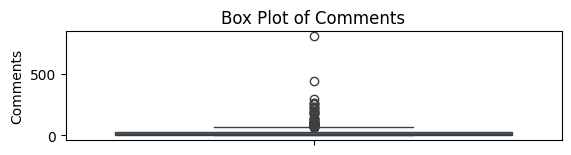

In [7]:
plt.subplot(3, 1, 2)
sns.boxplot(data=df['Comments'])
plt.title('Box Plot of Comments')
plt.ylabel('Comments')

In [8]:
lower_bound = df['Comments'].quantile(0.05)
upper_bound = df['Comments'].quantile(0.95)

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: 1.0
Upper Bound: 131.0999999999998


In [9]:
print(df[df['Comments']<lower_bound].count())
print(df[df['Comments']>upper_bound].count())

Username    0
Hashtags    0
Headings    0
Likes       0
Comments    0
Repost      0
dtype: int64
Username    22
Hashtags    22
Headings    22
Likes       22
Comments    22
Repost      22
dtype: int64


In [12]:
filtered_comments = df[(df['Comments'] >= lower_bound) & (df['Comments'] <= upper_bound)]

In [19]:
filtered_comments.to_csv('filtered_comments.csv')

Text(0.5, 1.0, 'Box Plot for Comments (Without Outliers)')

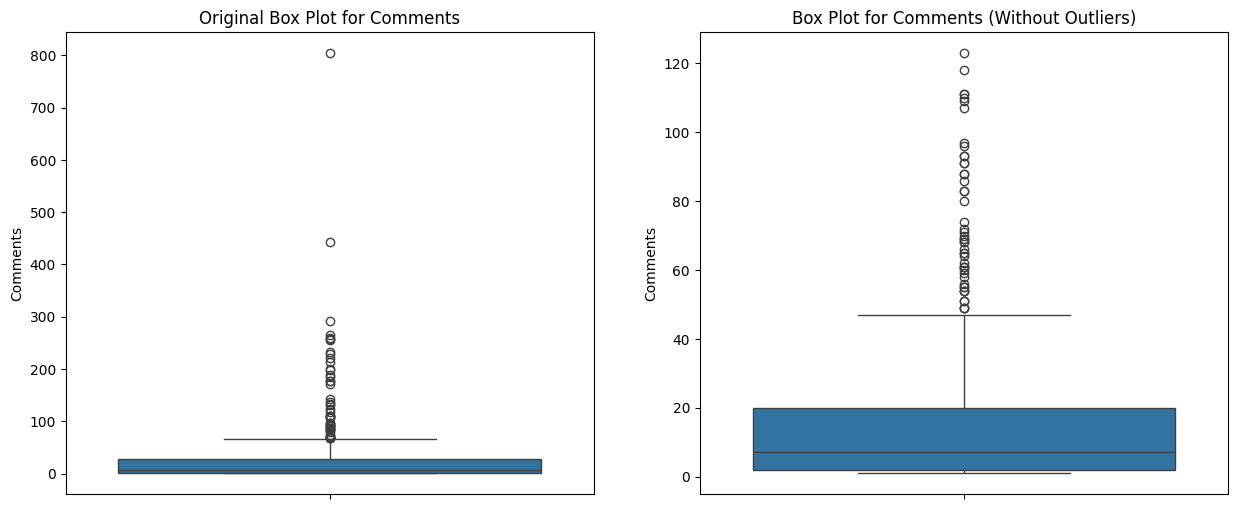

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(df['Comments'], ax=axes[0])
axes[0].set_title('Original Box Plot for Comments')

sns.boxplot(filtered_comments['Comments'], ax=axes[1])
axes[1].set_title('Box Plot for Comments (Without Outliers)')

In [32]:
avg_comments = filtered_comments['Comments'].mean()
print(f"Average Comments: {avg_comments}")

Average Comments: 17.42643391521197


In [15]:
unreliable_users = df[(df['Comments'] < lower_bound) | (df['Comments'] > upper_bound)]
print("Unreliable Users based on Comments:")
unreliable_usernames=unreliable_users['Username'].unique()
print(unreliable_usernames)

Unreliable Users based on Likes:
['washingtonpost' 'judicialwatch' 'nypost' 'wsj' 'cnn' 'npr' 'apnews'
 'msnbc']


In [16]:
reliable_users = df[(df['Comments'] >= lower_bound) & (df['Comments'] <= upper_bound)]
print("Reliable News Providers based on Comments:")
reliable_users = reliable_users[~reliable_users['Username'].isin(unreliable_usernames)]
print(reliable_users['Username'].unique())

Reliable News Providers based on Likes:
['dailymail' 'reuters' 'nytimes' 'foxnews' 'who' 'usatoday' 'dailycaller'
 'independent' 'newsweek' 'time']


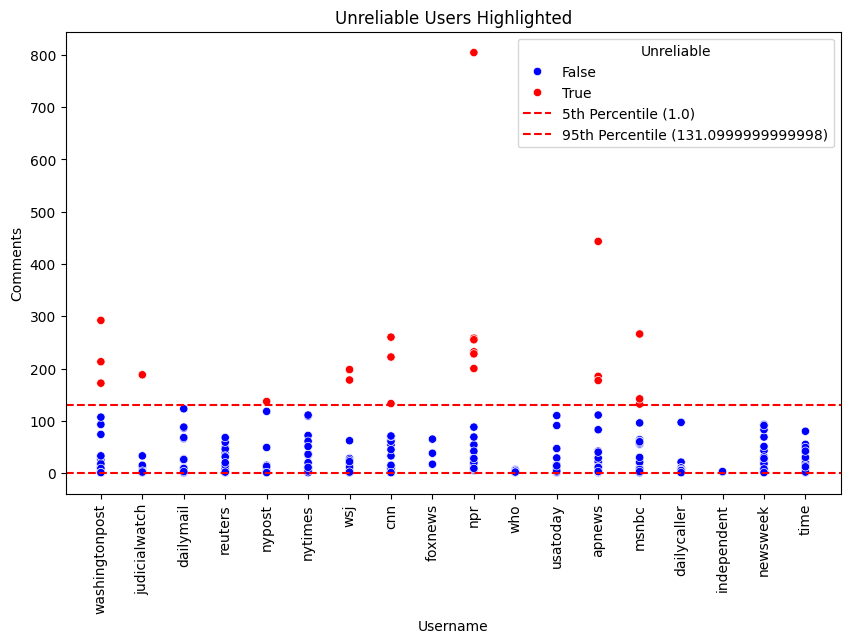

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Username', y='Comments', hue=(df['Comments'] < lower_bound) | (df['Comments'] > upper_bound), palette={True: 'red', False: 'blue'})
plt.title('Unreliable Users Highlighted')
plt.axhline(y=lower_bound, color='red', linestyle='--', label=f'5th Percentile ({lower_bound})')
plt.axhline(y=upper_bound, color='red', linestyle='--', label=f'95th Percentile ({upper_bound})')
plt.legend(title='Unreliable')
plt.xticks(rotation=90)
plt.show()

### Analysing the Repost metric

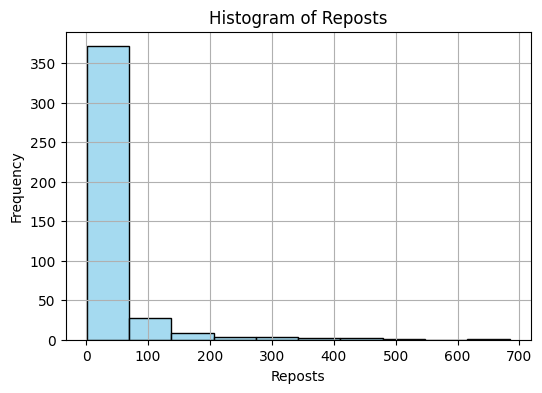

In [21]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Repost'], bins=10, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of Reposts')
plt.xlabel('Reposts')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Repost')

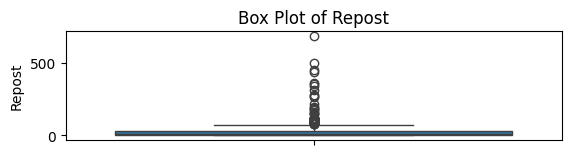

In [22]:
plt.subplot(3, 1, 2)
sns.boxplot(data=df['Repost'])
plt.title('Box Plot of Repost')
plt.ylabel('Repost')

In [24]:
lower_bound = df['Repost'].quantile(0.05)
upper_bound = df['Repost'].quantile(0.95)

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: 1.0
Upper Bound: 119.39999999999986


In [26]:
print(df[df['Repost']<lower_bound].count())
print(df[df['Repost']>upper_bound].count())

Username    0
Hashtags    0
Headings    0
Likes       0
Comments    0
Repost      0
dtype: int64
Username    21
Hashtags    21
Headings    21
Likes       21
Comments    21
Repost      21
dtype: int64


In [27]:
filtered_reposts = df[(df['Repost'] >= lower_bound) & (df['Repost'] <= upper_bound)]

In [28]:
filtered_reposts.to_csv('filtered_reposts.csv')

Text(0.5, 1.0, 'Box Plot for Repost (Without Outliers)')

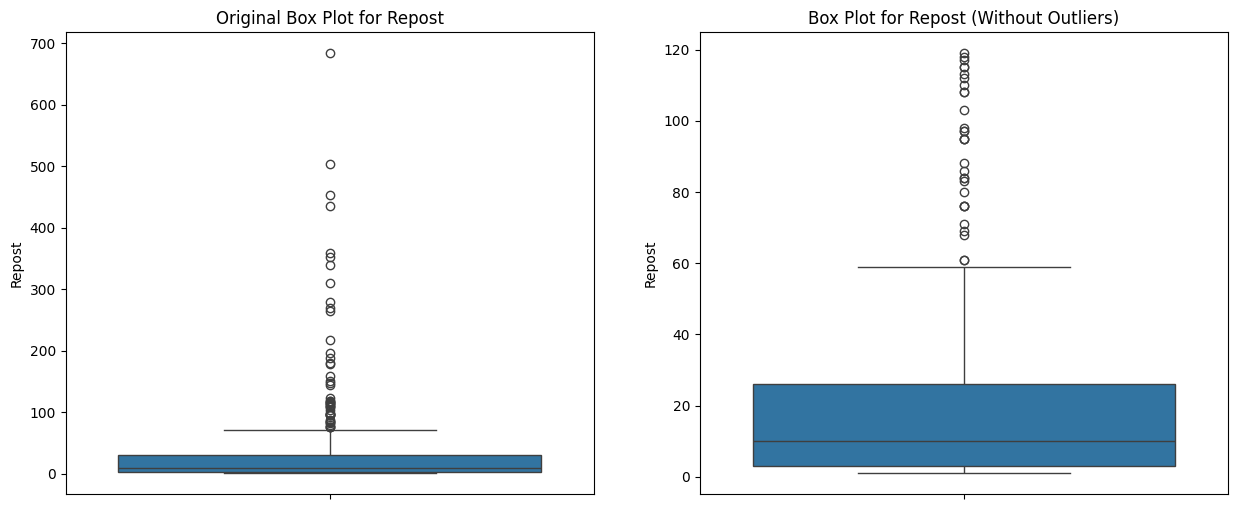

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(df['Repost'], ax=axes[0])
axes[0].set_title('Original Box Plot for Repost')

sns.boxplot(filtered_reposts['Repost'], ax=axes[1])
axes[1].set_title('Box Plot for Repost (Without Outliers)')

In [31]:
avg_reposts = filtered_comments['Repost'].mean()
print(f"Average Repost: {avg_reposts}")

Average Repost: 25.722921914357684


In [34]:
unreliable_users = df[(df['Repost'] < lower_bound) | (df['Repost'] > upper_bound)]
print("Unreliable Users based on Repost:")
unreliable_usernames=unreliable_users['Username'].unique()
print(unreliable_usernames)

Unreliable Users based on Repost:
['washingtonpost' 'judicialwatch' 'dailymail' 'reuters' 'wsj' 'npr' 'who'
 'usatoday' 'apnews' 'msnbc' 'time']


In [35]:
reliable_users = df[(df['Repost'] >= lower_bound) & (df['Repost'] <= upper_bound)]
print("Reliable News Providers based on Repost:")
reliable_users = reliable_users[~reliable_users['Username'].isin(unreliable_usernames)]
print(reliable_users['Username'].unique())

Reliable News Providers based on Repost:
['nypost' 'nytimes' 'cnn' 'foxnews' 'dailycaller' 'independent' 'newsweek']


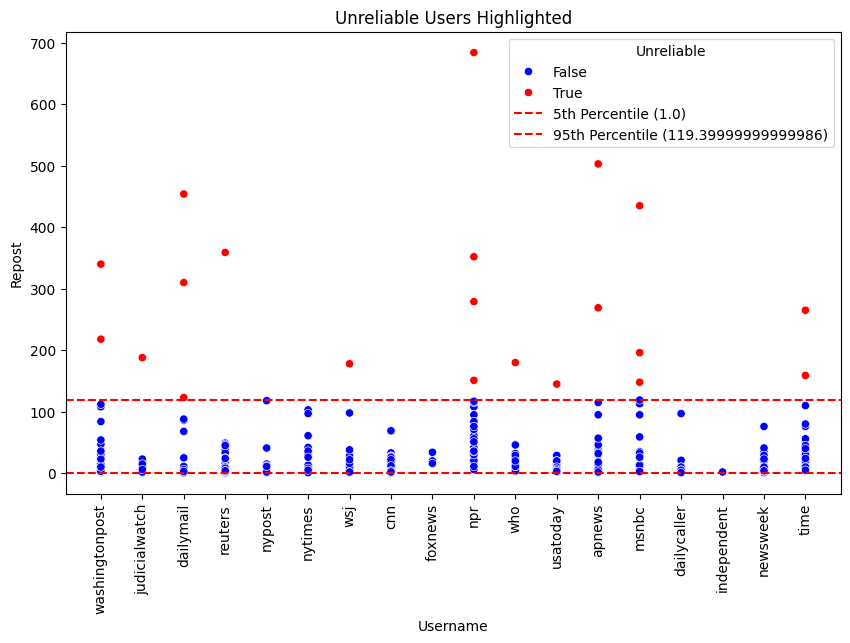

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Username', y='Repost', hue=(df['Repost'] < lower_bound) | (df['Repost'] > upper_bound), palette={True: 'red', False: 'blue'})
plt.title('Unreliable Users Highlighted')
plt.axhline(y=lower_bound, color='red', linestyle='--', label=f'5th Percentile ({lower_bound})')
plt.axhline(y=upper_bound, color='red', linestyle='--', label=f'95th Percentile ({upper_bound})')
plt.legend(title='Unreliable')
plt.xticks(rotation=90)
plt.show()

In [41]:
df['Comments'].sum()

12303.0